### Dummy Code for executing pan shops and pan shop sales
##### Activities
        EDA Analysis
        Some tricky questions solving


#### EDA Steps
    Data Ingestion
    Data Cleanup
    Data Statistics
    Data Visualization

##### Data Ingestion - Start

In [1]:
import pandas as pd
# Data Ingestion
pan_shops_path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shops.csv"
pan_shop_sales_path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shop_sales.csv"
pan_shops_df = pd.read_csv(pan_shops_path, na_values=["", "NA"], keep_default_na=False)
pan_shop_sales_df = pd.read_csv(pan_shop_sales_path, na_values=["", "NA"], keep_default_na=False)
pan_shops_df.name = "pan_shops"; pan_shop_sales_df.name="pan_shop_sales"
shops_df = pan_shops_df; sales_df = pan_shop_sales_df

#####  Data Ingestion - End

#####      Data Cleanup (If Required) - Start
    Check duplicates and remove them
    Check nulls and replace them

###### Check Duplicates

In [2]:
pan_shops_df.duplicated().sum(), pan_shop_sales_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [3]:
#### No Duplicates found
# If found code to remove duplicates
# pan_shops_df.drop_duplicates(keep="first").reset_index(drop=True)

###### Check nulls & replace them

In [4]:
pan_shops_df.isna().sum().sum(), pan_shop_sales_df.isna().sum().sum()

(np.int64(0), np.int64(0))

In [5]:
#### No Null values found

#####         Data Cleanup (If Required) - End

#####         Data Statistics - Start

In [6]:
pan_shops_categorical_col = pan_shops_df.columns[pan_shops_df.dtypes=="object"]
pan_shops_continuous_col = pan_shops_df.columns[pan_shops_df.dtypes!="object"]
pan_shops_categorical_col, pan_shops_continuous_col
pan_shop_sales_categorical_col = pan_shop_sales_df.columns[pan_shop_sales_df.dtypes == "object"]
pan_shop_sales_continuous_col = pan_shop_sales_df.columns[pan_shop_sales_df.dtypes!="object"]
pan_shop_sales_categorical_col, pan_shop_sales_continuous_col
shop_cat = pan_shops_categorical_col
shop_con = pan_shops_continuous_col
sales_cat = pan_shop_sales_categorical_col
sales_con = pan_shop_sales_continuous_col

#####         Data Statistics - End

##### Data Visualization - Start
    1.Univariate - Single column visulization
    2.Bivariate - two column
    3.Multivariate - multiple columns

##### Univariate - Single column visulization

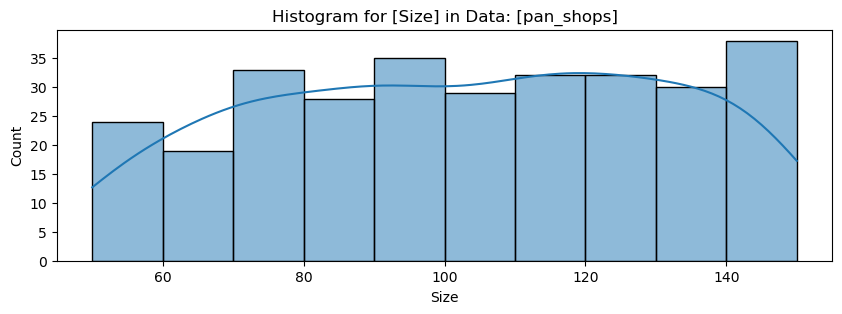

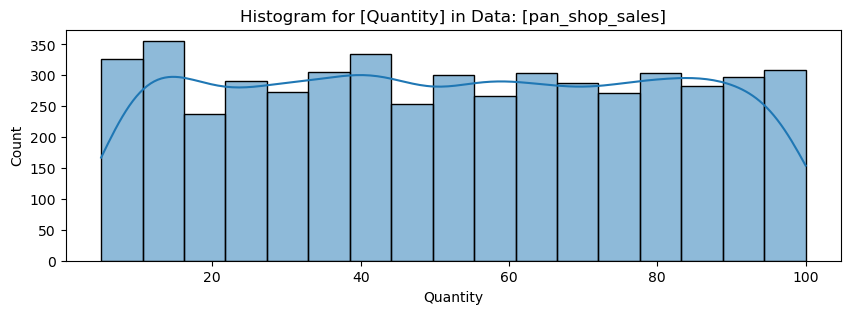

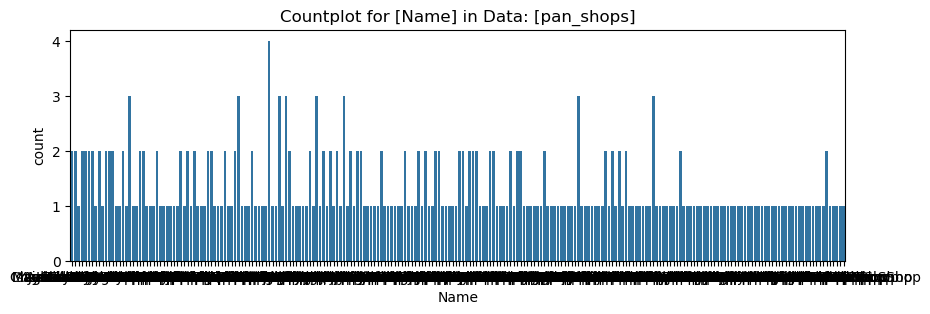

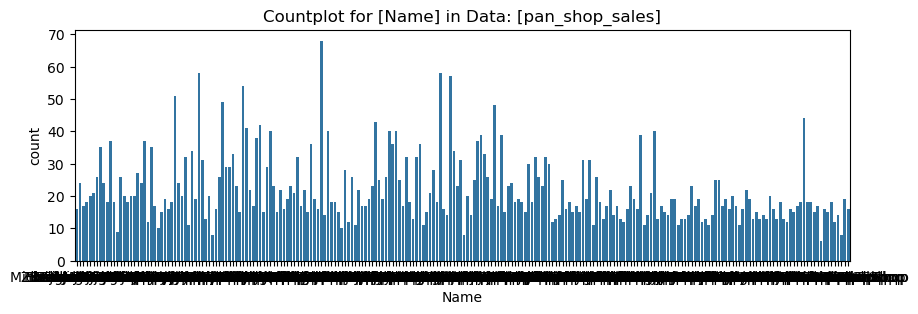

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for [{col}] in Data: [{df.name}]')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for [{col}] in Data: [{df.name}]')
    plt.show()

for col in shop_con:
    plot_histogram(shops_df, col)
    break

for col in sales_con:
    plot_histogram(sales_df, col)
    break # Just breaking for one column

for col in shop_cat:
    plot_count(shops_df, col)
    break # Just breaking for one column

for col in sales_cat:
    plot_count(sales_df, col)
    break

##### Bivariate - two columns
    Analyze two variables at a time
    1.continuous vs continuous -> scatterplot, regplot
    2.categorical vs continuous -> boxplot
    3.categorical vs categorical -> crosstab heatmap

In [8]:
# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y} for Data:{df.name}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y} for Data: {df.name}")
    plt.show()



In [9]:
shop_con,shop_cat

(Index(['Size', 'Rent'], dtype='object'),
 Index(['Name', 'Timings', 'Owner', 'Location', 'City', 'State'], dtype='object'))

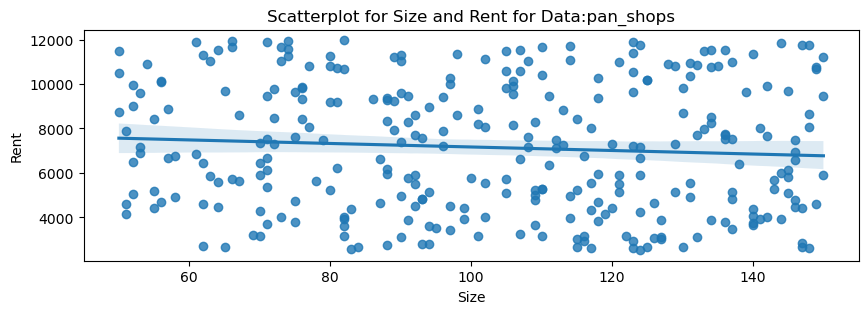

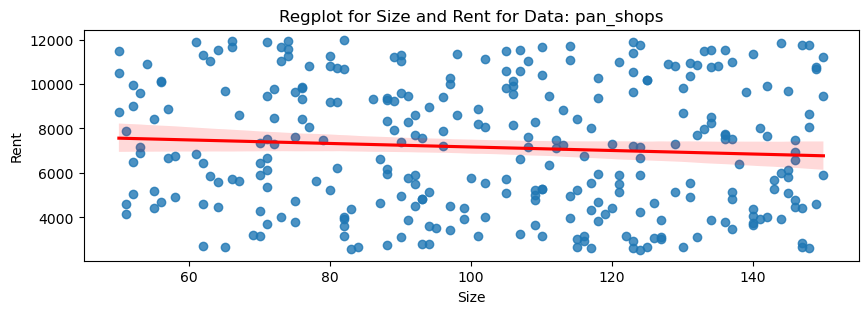

In [10]:
plot_scatter(shops_df, 'Size', 'Rent')
plot_reg(shops_df, 'Size', 'Rent')

In [11]:
sales_con, sales_cat

(Index(['Quantity', 'Sold', 'UnitPrice', 'Profit'], dtype='object'),
 Index(['Name', 'Date', 'Time', 'Item', 'Item_Description', 'Packed'], dtype='object'))

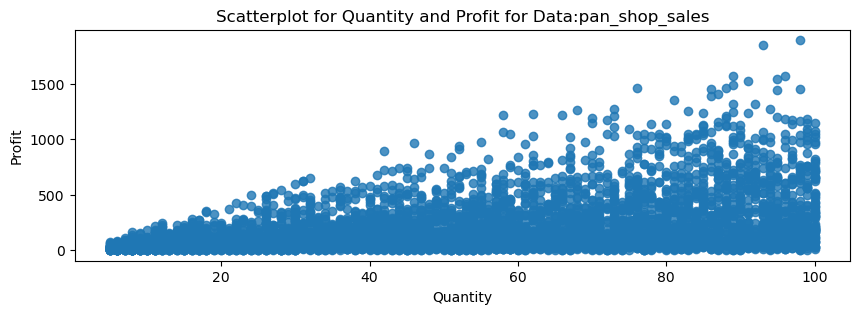

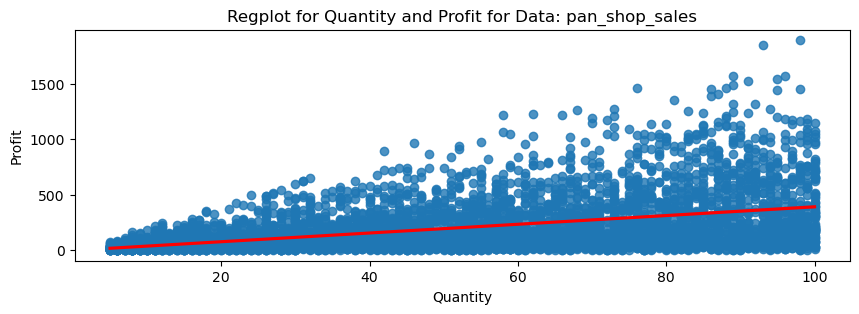

In [12]:
plot_scatter(sales_df, 'Quantity', 'Profit')
plot_reg(sales_df, 'Quantity', 'Profit')

##### categorical vs continuous -> boxplot

In [13]:
def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y} ")
    plt.xticks(rotation=90)
    plt.show()


In [14]:
shop_con,shop_cat

(Index(['Size', 'Rent'], dtype='object'),
 Index(['Name', 'Timings', 'Owner', 'Location', 'City', 'State'], dtype='object'))

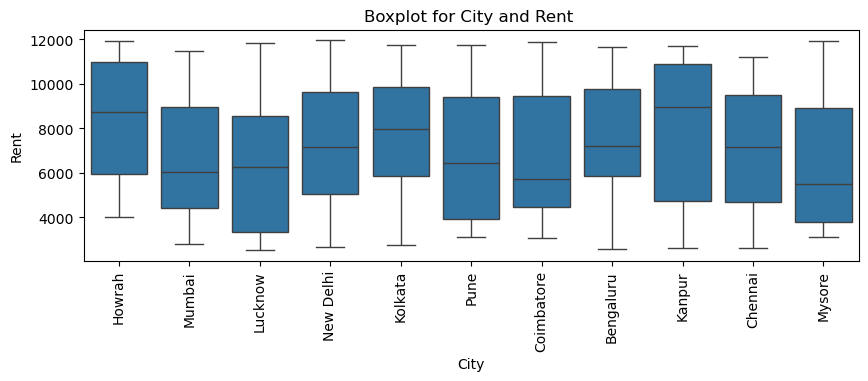

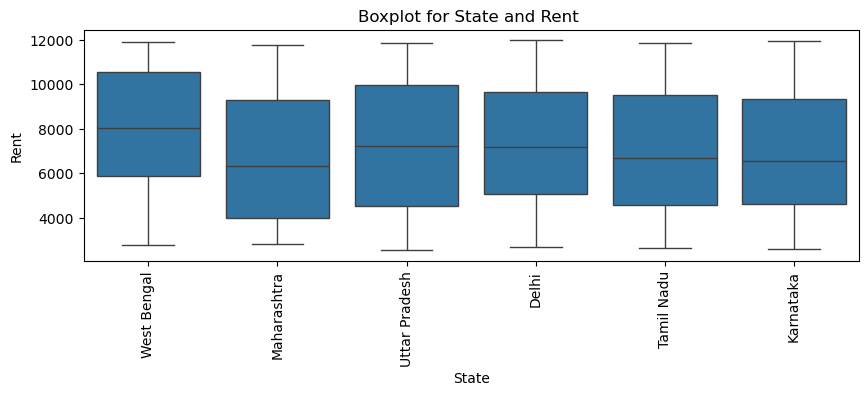

In [15]:
plot_box(shops_df, 'City', 'Rent')
plot_box(shops_df, 'State', 'Rent')

In [16]:
sales_con, sales_cat

(Index(['Quantity', 'Sold', 'UnitPrice', 'Profit'], dtype='object'),
 Index(['Name', 'Date', 'Time', 'Item', 'Item_Description', 'Packed'], dtype='object'))

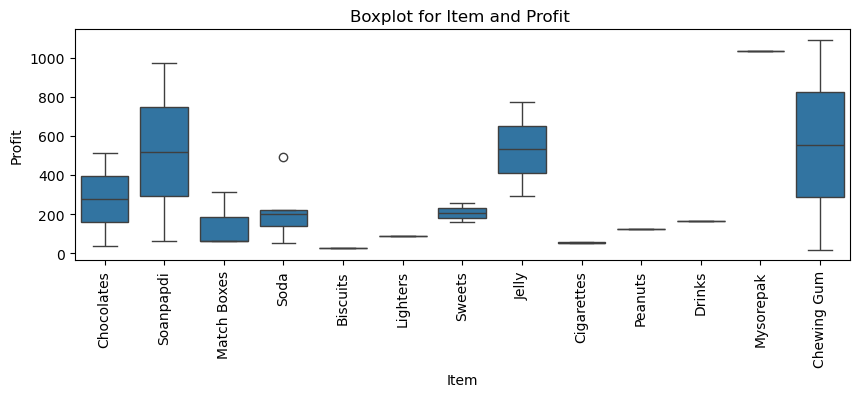

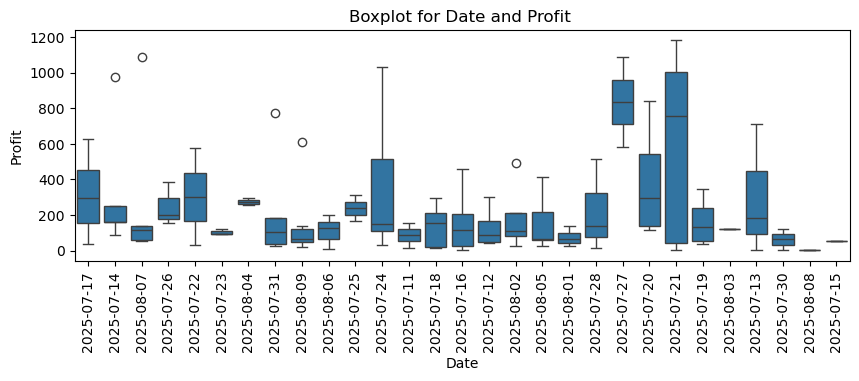

In [17]:
plot_box(sales_df.head(25), 'Item', 'Profit')
plot_box(sales_df.head(100), 'Date', 'Profit')

##### Data Visualization - End

##### Querying Examples on Dataframes - Start

In [18]:
# Get Min and Max Dates of Pan Shop Sales
sales_df['Date'].min(), sales_df['Date'].max()

('2025-07-11', '2025-08-09')

In [19]:
# Get Max Item Sold on Date 2025-07-10
sales_df.query("Date == '2025-07-10'").groupby(by = ["Date", "Sold"]).agg({"Sold":"max"}).nlargest(1, "Sold")

,,Sold
Date,Sold,


##### Querying Examples on Dataframes - End

In [20]:
# Get top 3 average Items Sold, shop name on min Date which is 2025-07-11
min_date = sales_df['Date'].min()
sales_df.query("Date == @min_date").groupby(by = ["Name"]).agg({"Sold":"mean"}).nlargest(3, "Sold")


,Sold
Name,
Barkha's Pan Shop,95.0
Rachana's Pan Shop,90.0
Anamika's Pan Shop,85.0


In [21]:
# Get Shop Name by Max Items Sold on Min Date
# Get Shop Name
# Max Items (sum) max of Sold
# Filter Min Date 
min_date = sales_df['Date'].min()
sales_df.query("Date == @min_date").groupby(by="Name").agg({"Sold":"sum"}).nlargest(1, "Sold")

,Sold
Name,
Quincy's Pan Shop,172


In [22]:
# Get Bottom 3 Shop Names by Min Items Sold on Min Date
# Get Shop Name
# Min Items (sum) min of Sold
# Filter Min Date 
min_date = sales_df['Date'].min()
sales_df.query("Date == @min_date").groupby(by="Name").agg({"Sold":"sum"}).nsmallest(3, "Sold")

,Sold
Name,
Faras's Pan Shop,1
Gayathri's Pan Shop,1
Ojasvi's Pan Shop,1


In [23]:
# Get Top and Bottom 3 Shop Names by Max and Min Items Sold on Min Date
# Get Shop Name
# Max and Min Items (sum) max, min 3  of Sold
# Filter Min Date min()
# Use concat for both max and min shop names
min_date = sales_df['Date'].min()
consolidated_sum_of_sales_on_min_dates = sales_df.query("Date == @min_date").groupby(by="Name").agg({"Sold":"sum"})
pd.concat([consolidated_sum_of_sales_on_min_dates.nlargest(3, "Sold"), consolidated_sum_of_sales_on_min_dates.nsmallest(3, "Sold")])

,Sold
Name,
Quincy's Pan Shop,172
Siya's Pan Shop,131
Faqid's Pan Shop,120
Faras's Pan Shop,1
Gayathri's Pan Shop,1
Ojasvi's Pan Shop,1


In [24]:
#Get Top & Bottom 3 Shop Names by Max Profit on Dates min_date , min_date + 1
# Get Shop Name
# Max and Min Profits (sum) max, min 3 of Profit
# Filter (start_date = Min_date , end_date= min_date + 1)
# use concat for top and bottom shop names

start_date = sales_df['Date'].min()
end_date = pd.to_datetime(start_date) + pd.Timedelta(days=1)

consolidated_shops_profit = (
    sales_df.query("Date == @start_date or Date == @end_date")
    .groupby(by = "Name")
    .agg({"Profit":"sum"})
    .round(2)
)
pd.concat([
consolidated_shops_profit.nlargest(3, "Profit").assign(Rank="Top 3"), 
consolidated_shops_profit.nsmallest(3, "Profit").assign(Rank="Bottom 3")
]).reset_index()



,Name,Profit,Rank
0,Siya's Pan Shop,1601.93,Top 3
1,Neelima's Pan Shop,1505.37,Top 3
2,Sara's Pan Shop,1176.54,Top 3
3,Saksham's Pan Shop,3.48,Bottom 3
4,William's Pan Shop,5.16,Bottom 3
5,Ojasvi's Pan Shop,7.43,Bottom 3


In [25]:
#Get Top & Bottom 3 Items, shop name by Max Sold in shops on Dates min_date , min_date + 1
# Get Item
# Max and Min Profits (sum) max, min 3 of Sold
# Filter (start_date = Min_date , end_date= min_date + 1)
# use concat for top and bottom shop names

start_date = sales_df['Date'].min()
end_date = pd.to_datetime(start_date) + pd.Timedelta(days=1)

consolidated_shops_items_sold = (
    sales_df.query("Date == @start_date or Date == @end_date")
    .groupby(by = ["Name", "Item"])
    .agg({"Sold":"sum"})
    .round(2)
)
pd.concat([
consolidated_shops_items_sold.nlargest(3, "Sold").assign(Rank="Top 3"), 
consolidated_shops_items_sold.nsmallest(3, "Sold").assign(Rank="Bottom 3")
]).reset_index()

,Name,Item,Sold,Rank
0,Quincy's Pan Shop,Drinks,126,Top 3
1,Barkha's Pan Shop,Jelly,95,Top 3
2,Rachana's Pan Shop,Cigarettes,90,Top 3
3,Faras's Pan Shop,Biscuits,1,Bottom 3
4,Gayathri's Pan Shop,Peanuts,1,Bottom 3
5,Ojasvi's Pan Shop,Lighters,1,Bottom 3


In [26]:
# Get Top and Bottom (Item_Description)local selling shop names on Date '2025-07-27'
# Get Name
# Max and Min Sold (sum) max, min of Sold
# Filter (Date = '2025-07-27' and Item_Description = 'local')
# use concat for top and bottom shop names

query_date = '2025-07-27'

consolidated_shops_max_local_items_sold = (
    sales_df.query("Date == @query_date and Item_Description == 'Local'")
    .groupby(by = ["Name"])
    .agg({"Sold":"sum"})
    .round(2)
)
pd.concat([
consolidated_shops_max_local_items_sold.nlargest(1, "Sold").assign(Rank="Top"), 
consolidated_shops_max_local_items_sold.nsmallest(1, "Sold").assign(Rank="Bottom")
]).reset_index()


,Name,Sold,Rank
0,Nathan's Pan Shop,109,Top
1,Adweta's Pan Shop,1,Bottom


In [27]:
# Get Top and Bottom 3 UnitPrice, Item
# Get Top and Bottom 3 UnitPrice indexes using nlargest and nsmallest of column UnitPrice
# use index loc and get column values of UnitPrice and item
# use concat for top and bottom 3 UnitPrice

unit_price = sales_df["UnitPrice"]

unit_price_col_idx = sales_df.columns.get_loc('UnitPrice')
item_col_idx = sales_df.columns.get_loc('Item')

pd.concat([
sales_df.iloc[unit_price.nlargest(3).index, [unit_price_col_idx, item_col_idx]],
sales_df.iloc[unit_price.nsmallest(3).index, [unit_price_col_idx, item_col_idx]]
]).reset_index()


,index,UnitPrice,Item
0,3098,59.99,Soda
1,3482,59.99,Cigarettes
2,4914,59.98,Chips
3,2939,2.00,Lighters
4,3647,2.02,Drinks
5,1517,2.03,Lighters


In [28]:
# Get Top and Bottom 3 UnitPrice, Item
# Get Top 3 UnitPrice using nlargest and select columns  Item, UnitPrice 
# Get Bottom 3 UnitPrice using nsmallest  and select columns  Item, UnitPrice
# use concat for top and bottom 3 UnitPrice

top_3_unit_price = sales_df.nlargest(3, "UnitPrice")[["Item", "UnitPrice"]].assign(Rank="Top 3")
bottom_3_unit_price = sales_df.nsmallest(3, "UnitPrice")[["Item", "UnitPrice", ]].assign(Rank="Bottom 3")

pd.concat([top_3_unit_price, bottom_3_unit_price]).sort_values(by="UnitPrice", ascending=False).reset_index(drop=True)


,Item,UnitPrice,Rank
0,Soda,59.99,Top 3
1,Cigarettes,59.99,Top 3
2,Chips,59.98,Top 3
3,Lighters,2.03,Bottom 3
4,Drinks,2.02,Bottom 3
5,Lighters,2.00,Bottom 3


In [29]:
# Get Top and Bottom 3 by Profit and get columns Shop Name, Date , Profit
# Get Top 3 Profit using nlargest and select columns  Name, Profit, Date
# Get Bottom 3 Profit using nsmallest  and select columns  Name, Profit, Date
# use concat for top and bottom 3 Profit

top_3_unit_price = sales_df.nlargest(3, "Profit")[["Name", "Date", "Profit"]].assign(Rank="Top 3")
bottom_3_unit_price = sales_df.nsmallest(3, "Profit")[["Name", "Date", "Profit"]].assign(Rank="Bottom 3")

top_and_bottom_3_profits =pd.concat([top_3_unit_price, bottom_3_unit_price]).sort_values(by="Profit", ascending=False).reset_index(drop=True)

In [30]:
# Groupby Analysis 
type(sales_df.groupby(by="Date"))
type(sales_df.groupby(by="Date").value_counts())
sales_df.groupby(["Date", "Name"]).size().reset_index(name="Count").nlargest(1, "Count")
type(sales_df.groupby(by="Date").value_counts().reset_index(name="count"))
sales_df.groupby("Date")

In [31]:
# Get Top and Bottom Profit by each date

# Group by Date and Name
grouped = sales_df.groupby(["Date", "Name"], as_index=False)["Profit"].sum()

# Top 3 per date
top = grouped.sort_values(["Date", "Profit"], ascending=[True, False]).groupby("Date").head(3).assign(Rank="Top")
# Bottom 3 per date
bottom = grouped.sort_values(["Date", "Profit"], ascending=[True, True]).groupby("Date").head(3).assign(Rank="Bottom")

# Combine
result = pd.concat([top, bottom]).sort_values(["Date", "Rank", "Profit"], ascending=[True, True, False]).reset_index(drop=True)


In [32]:
# Get Top and Bottom Profit by Item

""" Steps
    1. Group Items based on profit sum to profit_per_items variable (DataFrame)
    2. Get top 3 values from profit_per_items using nlargest and assign Rank ('Top 3')
    3. Get bottom 3 values from profit_per_items using nsmallest and assign Rank ('Bottom 3')
    4. Concat top and bottom 3 values from profit_per_items and sort values on 'Profit' in descending order
"""

#Group by Item for profit sum
profit_per_items = sales_df.groupby("Item").agg({"Profit":"sum"})

#Top 3 profits/item
top_3_profits_per_item = profit_per_items.nlargest(3, "Profit").assign(Rank = "Top 3")
#Bottom 3 profits/item
bottom_3_profits_per_item = profit_per_items.nsmallest(3, "Profit").assign(Rank = "Bottom 3")
# Combined (Top/Bottom 3 profits/item)
top_and_bottom_3_profits_per_item = pd.concat([top_3_profits_per_item, bottom_3_profits_per_item]).sort_values(by = "Profit", ascending=False)


In [33]:
# Get Top and Bottom Profit by Item per day

""" Steps
    1. Group Items based on profit sum to profit_by_items_per_day variable (DataFrame)
    2. Get top 3 values from profit_by_items_per_day using sort values on (Date, Profit) and assign Rank ('Top 3')
    3. Get bottom 3 values from profit_by_items_per_day using sort values on (Date, Profit) and assign Rank ('Bottom 3')
    4. Concat top and bottom 3 values from profit_items_per_day and sort values on 'Profit' in descending order
"""

#Group by Item for profit sum
profit_by_items_per_day = sales_df.groupby(["Date", "Item"], group_keys=False).agg({"Profit":"sum"})


#Top 3 profit items per day 
top_3_profit_items_per_day = profit_by_items_per_day.sort_values(by = ["Date", "Profit"], ascending=[True, False])\
                                                    .groupby("Date", group_keys=False)\
                                                    .head(3)\
                                                    .assign(Rank = "Top 3")
#Bottom 3 profit items per day
bottom_3_profit_items_per_day = profit_by_items_per_day.sort_values(by = ["Date", "Profit"], ascending=[True, True])\
                                                    .groupby("Date", group_keys=False)\
                                                    .head(3)\
                                                    .assign(Rank = "Bottom 3")

# Combined (Top/Bottom 3 profit items per day)
top_and_bottom_3_profit_items_per_day = pd.concat([top_3_profit_items_per_day, bottom_3_profit_items_per_day])\
                                            .sort_values(by=["Date", "Profit"], ascending=[True, False])
top_and_bottom_3_profit_items_per_day

Profit      Rank
Date       Item                          
2025-07-11 Biscuits     4249.13     Top 3
           Soanpapdi    3765.31     Top 3
           Chewing Gum  3759.35     Top 3
           Lighters     1270.29  Bottom 3
           Match Boxes   881.64  Bottom 3
...                         ...       ...
2025-08-09 Sweets       4519.61     Top 3
           Match Boxes  4239.01     Top 3
           Mysorepak    1791.58  Bottom 3
           Chewing Gum  1677.59  Bottom 3
           Soda         1328.68  Bottom 3

[180 rows x 2 columns]

In [34]:
# Get Top and Bottom Sold Item per day

""" Steps
    1. Group Items based on profit sum to sold_items_per_day variable (DataFrame)
    2. Get top 3 values from sold_items_per_day using sort values on (Date, Sold) and assign Rank ('Top 3')
    3. Get bottom 3 values from sold_items_per_day using sort values on (Date, Sold) and assign Rank ('Bottom 3')
    4. Concat top and bottom 3 values from sold_items_per_day and sort_values on 'Date' ascending and 'Sold' in descending order
"""

#Group by Item for sold sum
sold_items_per_day = sales_df.groupby(["Date", "Item"], group_keys=False).agg({"Sold":"sum"})


#Top 3 sold items per day 
top_3_sold_items_per_day = sold_items_per_day.sort_values(by = ["Date", "Sold"], ascending=[True, False])\
                                                    .groupby("Date", group_keys=False)\
                                                    .head(3)\
                                                    .assign(Rank = "Top 3")

#Bottom 3 sold items per day
bottom_3_sold_items_per_day = sold_items_per_day.sort_values(by = ["Date", "Sold"], ascending=[True, True])\
                                                    .groupby("Date", group_keys=False)\
                                                    .head(3)\
                                                    .assign(Rank = "Bottom 3")

# Combined (Top/Bottom 3 sold items per day)
top_and_bottom_3_sold_items_per_day = pd.concat([top_3_sold_items_per_day, bottom_3_sold_items_per_day])\
                                            .sort_values(by=["Date", "Sold"], ascending=[True, False])
top_and_bottom_3_sold_items_per_day

Sold      Rank
Date       Item                       
2025-07-11 Biscuits      579     Top 3
           Soanpapdi     486     Top 3
           Drinks        413     Top 3
           Match Boxes   193  Bottom 3
           Lighters      166  Bottom 3
...                      ...       ...
2025-08-09 Sweets        525     Top 3
           Biscuits      518     Top 3
           Chewing Gum   285  Bottom 3
           Peanuts       240  Bottom 3
           Soda          207  Bottom 3

[180 rows x 2 columns]

In [35]:
# Merge DataFrames
shop_sales_details = shops_df.merge(sales_df, on ="Name", how="left")
shop_sales_details

,Name,Size,Timings,Owner,Rent,Location,City,State,Date,Time,Item,Item_Description,Packed,Quantity,Sold,UnitPrice,Profit
0,Isaiah's Pan Shop,74,11:00 - 21:00,Kala Mody,11914,"H.No. 75, Chandran Chowk",Howrah,West Bengal,2025-07-18,07:01:00,Drinks,International,Yes,31,30,48.55,480.35
1,Isaiah's Pan Shop,74,11:00 - 21:00,Kala Mody,11914,"H.No. 75, Chandran Chowk",Howrah,West Bengal,2025-08-01,05:39:57,Chocolates,Domestic,Yes,76,66,33.71,301.59
2,Isaiah's Pan Shop,74,11:00 - 21:00,Kala Mody,11914,"H.No. 75, Chandran Chowk",Howrah,West Bengal,2025-08-08,07:40:23,Drinks,Domestic,Yes,31,6,34.50,21.07
3,Isaiah's Pan Shop,74,11:00 - 21:00,Kala Mody,11914,"H.No. 75, Chandran Chowk",Howrah,West Bengal,2025-08-07,16:19:10,Chewing Gum,International,Yes,59,14,31.67,102.71
4,Isaiah's Pan Shop,74,11:00 - 21:00,Kala Mody,11914,"H.No. 75, Chandran Chowk",Howrah,West Bengal,2025-07-25,12:05:07,Biscuits,International,Yes,78,56,36.25,476.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,Lakshmi's Pan Shop,90,9:00 - 22:00,Balvan Shere,7389,"H.No. 39, Gandhi Street",Kolkata,West Bengal,2025-08-08,06:38:47,Lighters,Local,Yes,9,4,43.44,68.16
7732,Lakshmi's Pan Shop,90,9:00 - 22:00,Balvan Shere,7389,"H.No. 39, Gandhi Street",Kolkata,West Bengal,2025-08-06,12:39:18,Soanpapdi,Local,No,86,70,50.11,1065.57
7733,Lakshmi's Pan Shop,90,9:00 - 22:00,Balvan Shere,7389,"H.No. 39, Gandhi Street",Kolkata,West Bengal,2025-07-29,22:10:25,Jelly,Local,No,45,1,55.29,19.58
7734,Lakshmi's Pan Shop,90,9:00 - 22:00,Balvan Shere,7389,"H.No. 39, Gandhi Street",Kolkata,West Bengal,2025-08-04,16:53:42,Match Boxes,Local,No,95,8,31.78,79.19


### Operations on merged df


In [36]:
# Get Columns
shop_sales_details.columns

Index(['Name', 'Size', 'Timings', 'Owner', 'Rent', 'Location', 'City', 'State',
       'Date', 'Time', 'Item', 'Item_Description', 'Packed', 'Quantity',
       'Sold', 'UnitPrice', 'Profit'],
      dtype='object')

In [37]:
# Get Statewise Profit
# Columns to be used State, Profit
statewise_profit = shop_sales_details.groupby(["State"]).agg({"Profit":"sum"}).reset_index()

In [38]:
# Get Citywise Profit
# Columns to be used City, Profit
# Group by City since we need to find it City wise and calculate the sum of Profit
citywise_profit = shop_sales_details.groupby("City").agg({"Profit":"sum"}).reset_index()

In [39]:
# Get Citywise avearage Profit
# Columns to be used City, Profit
# Group by City since we need to find it City wise and calculate the mean of Profit
citywise_profit = shop_sales_details.groupby("City").agg({"Profit":"mean"}).reset_index()

In [40]:
# Get Total Unique Shop Names Count
total_shops_count = shop_sales_details['Name'].nunique()
total_shops_count

228

###  Save CSV to Path

In [41]:
pan_shop_and_sales_path\
        = 'D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shop_and_sales_path.csv'
shop_sales_details.to_csv(pan_shop_and_sales_path, index=False)

In [42]:
#Get Citywise unique shops count
citywise_shops_count = shop_sales_details.groupby("City")\
                                        .agg(Unique_Shop_Names_Count=("Name", "nunique"))\
                                        .reset_index()
citywise_shops_count

,City,Unique_Shop_Names_Count
0,Bengaluru,28
1,Chennai,26
2,Coimbatore,26
3,Howrah,20
4,Kanpur,19
5,Kolkata,26
6,Lucknow,24
7,Mumbai,25
8,Mysore,22
9,New Delhi,52


In [43]:
#Get Statewise unique shops count
statewise_shops_count = shop_sales_details.groupby("State")\
                                        .agg(Unique_Shop_Names_Count=("Name", "nunique"))\
                                        .reset_index()
statewise_shops_count

,State,Unique_Shop_Names_Count
0,Delhi,52
1,Karnataka,48
2,Maharashtra,48
3,Tamil Nadu,52
4,Uttar Pradesh,42
5,West Bengal,43


In [44]:
#Get Statewise total shops count
statewise_total_shops_count = shop_sales_details.groupby("State")\
                                        .agg(Shops_Count=("Name", "count"))\
                                        .reset_index()
statewise_total_shops_count

,State,Shops_Count
0,Delhi,1310
1,Karnataka,1340
2,Maharashtra,1265
3,Tamil Nadu,1436
4,Uttar Pradesh,1246
5,West Bengal,1139


In [45]:
#Get State and city wise total shops count
statewise_total_shops_count = shop_sales_details.groupby(["State", "City"])\
                                        .agg(Shops_Count=("Name", "count"))\
                                        .reset_index()
statewise_total_shops_count

,State,City,Shops_Count
0,Delhi,New Delhi,1310
1,Karnataka,Bengaluru,744
2,Karnataka,Mysore,596
3,Maharashtra,Mumbai,670
4,Maharashtra,Pune,595
5,Tamil Nadu,Chennai,747
6,Tamil Nadu,Coimbatore,689
7,Uttar Pradesh,Kanpur,470
8,Uttar Pradesh,Lucknow,776
9,West Bengal,Howrah,535


In [46]:
#Get State and city and locatoin wise total shops count
statewise_total_shops_count = shop_sales_details.groupby(["State", "City", "Location"])\
                                        .agg(Shops_Count=("Name", "count"))\
                                        .reset_index()
statewise_total_shops_count

,State,City,Location,Shops_Count
0,Delhi,New Delhi,"015, Lata Street",37
1,Delhi,New Delhi,"038, Nagi",17
2,Delhi,New Delhi,"04/92, Wali Nagar",37
3,Delhi,New Delhi,08\nKant Zila,17
4,Delhi,New Delhi,11/406\nPau Street,18
...,...,...,...,...
295,West Bengal,Kolkata,H.No. 58\nLall Zila,12
296,West Bengal,Kolkata,"H.No. 585, Sridhar Circle",25
297,West Bengal,Kolkata,H.No. 65\nNanda Chowk,18
298,West Bengal,Kolkata,"H.No. 73, Wali Marg",8


In [47]:
# Get top and bottom of total shops count by  state, city and location wise 
state_city_location_wise_shops_count = (shop_sales_details.groupby(["State", "City", "Location"])\
                                        .agg(Shops_Count=("Name", "count"))\
                                        .reset_index()
)

pd.concat([state_city_location_wise_shops_count.nlargest(1, "Shops_Count"), 
           state_city_location_wise_shops_count.nsmallest(1, "Shops_Count")])


,State,City,Location,Shops_Count
60,Karnataka,Bengaluru,44\nThaman Chowk,68
58,Karnataka,Bengaluru,"25, Yogi Circle",6


In [48]:
# Get Statewise Sales per day
# Columns used  State, Sold, Date
# Groupby "Date", "State" (group keys = false)
# Aggregate on Sold for sum
# reset index
state_wise_sales_per_day = (
    shop_sales_details.groupby(by=["Date", "State"], group_keys=False)
    .agg({"Sold":"sum"}).reset_index()
)
state_wise_sales_per_day

,Date,State,Sold
0,2025-07-11,Delhi,1270
1,2025-07-11,Karnataka,1264
2,2025-07-11,Maharashtra,1296
3,2025-07-11,Tamil Nadu,999
4,2025-07-11,Uttar Pradesh,850
...,...,...,...
175,2025-08-09,Karnataka,1522
176,2025-08-09,Maharashtra,901
177,2025-08-09,Tamil Nadu,1738
178,2025-08-09,Uttar Pradesh,1534


In [49]:
# Get Top and Bottom States based on Sales per day
# Columns used  State, Sold, Date
# Groupby "Date", "State" (group keys = false)
# Aggregate on Sold for sum
# reset index
# Get top sale per day for state by sorting values Date - Asc, Sold - Desc and group by Date with no group keys and get first value
# Get bottom sale per day for state by sorting values Date - Desc, Sold - Desc and group by Date with no group keys and get first value

state_wise_sales = (
    shop_sales_details.groupby(by=["Date", "State"], group_keys=False)
                      .agg( Sales=("Sold", "sum") )
                      .reset_index()
)

top_sale_per_state_per_day = (
    state_wise_sales.sort_values(by=["Date", "Sales"], ascending=[True, False])
    .groupby("Date", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)

bottom_sale_per_state_per_day = (
    state_wise_sales.sort_values(by=["Date", "Sales"], ascending=[True, True])
                    .groupby("Date", group_keys=False)
                    .head(1)
                    .reset_index(drop=True)
)

pd.concat([
    top_sale_per_state_per_day, bottom_sale_per_state_per_day
]).sort_values(by=["Date"], ascending=[True]).reset_index(drop=True)

,Date,State,Sales
0,2025-07-11,Maharashtra,1296
1,2025-07-11,Uttar Pradesh,850
2,2025-07-12,Karnataka,1456
3,2025-07-12,Uttar Pradesh,1154
4,2025-07-13,Tamil Nadu,1660
5,2025-07-13,West Bengal,654
6,2025-07-14,Karnataka,1067
7,2025-07-14,Delhi,635
8,2025-07-15,Delhi,1345
9,2025-07-15,Karnataka,696


In [50]:
# Get Top and Bottom Cities based on Sales per day
# Columns used  City, Sold, Date
# Groupby "Date", "City" (group keys = false)
# Aggregate on Sold for sum
# reset index
# Get top sale city per day by sorting values Date - Asc, Sold - Desc and group by Date with no group keys and get first value
# Get bottom sale city per day by sorting values Date - Desc, Sold - Desc and group by Date with no group keys and get first value

city_sales = (
    shop_sales_details.groupby(by=["Date", "City"], group_keys=False)
                      .agg( Sales=("Sold", "sum") )
                      .reset_index()
)

top_sales_city_per_day = (
    city_sales.sort_values(by=["Date", "Sales"], ascending=[True, False])
    .groupby("Date", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)

bottom_sales_city_per_day = (
    city_sales.sort_values(by=["Date", "Sales"], ascending=[True, True])
                    .groupby("Date", group_keys=False)
                    .head(1)
                    .reset_index(drop=True)
)

pd.concat([
    top_sales_city_per_day, bottom_sales_city_per_day
]).sort_values(by=["Date"], ascending=[True]).reset_index(drop=True)

,Date,City,Sales
0,2025-07-11,New Delhi,1270
1,2025-07-11,Kanpur,278
2,2025-07-12,New Delhi,1181
3,2025-07-12,Kolkata,501
4,2025-07-13,New Delhi,1274
5,2025-07-13,Kanpur,227
6,2025-07-14,Kolkata,717
7,2025-07-14,Mumbai,311
8,2025-07-15,New Delhi,1345
9,2025-07-15,Mysore,268


In [51]:
# Get Top and Bottom Cities based on Sales per Item
# Columns used  City, Sold, Item
# Groupby "Item", "City" (group keys = false)
# Aggregate on Sold for sum
# reset index
# Get top sale city per Item by sorting values Item - Asc, Sold - Desc and group by Item with no group keys and get first value
# Get bottom sale city per Item by sorting values Item - Asc, Sold - Asc and group by Item with no group keys and get first value

item_city_sales = (
    shop_sales_details.groupby(by=["Item", "City"], group_keys=False)
                      .agg( Sales=("Sold", "sum") )
                      .reset_index()
)

top_item_city_sales = (
    item_city_sales.sort_values(by=["Item", "Sales"], ascending=[True, False])
    .groupby("Item", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
top_item_city_sales["Sale_Type"] = top_item_city_sales['City'] +" is highest in sales for "+top_item_city_sales['Item']

bottom_item_city_sales = (
    item_city_sales.sort_values(by=["Item", "Sales"], ascending=[True, True])
                    .groupby("Item", group_keys=False)
                    .head(1)
                    .reset_index(drop=True)
)
bottom_item_city_sales["Sale_Type"] = bottom_item_city_sales['City'] +" is lowest in sales for "+bottom_item_city_sales['Item']
pd.concat([
    top_item_city_sales, bottom_item_city_sales
]).sort_values(by=["Item"], ascending=[True]).reset_index(drop=True)

,Item,City,Sales,Sale_Type
0,Biscuits,New Delhi,2102,New Delhi is highest in sales for Biscuits
1,Biscuits,Howrah,873,Howrah is lowest in sales for Biscuits
2,Chewing Gum,New Delhi,2733,New Delhi is highest in sales for Chewing Gum
3,Chewing Gum,Howrah,730,Howrah is lowest in sales for Chewing Gum
4,Chips,New Delhi,2400,New Delhi is highest in sales for Chips
5,Chips,Chennai,833,Chennai is lowest in sales for Chips
6,Chocolates,New Delhi,2340,New Delhi is highest in sales for Chocolates
7,Chocolates,Kanpur,449,Kanpur is lowest in sales for Chocolates
8,Cigarettes,New Delhi,2760,New Delhi is highest in sales for Cigarettes
9,Cigarettes,Kanpur,615,Kanpur is lowest in sales for Cigarettes


In [52]:
# Get Top and Bottom Cities based on Profit per State
# Columns used  City, Profit, State
# Groupby "State", "City" (group keys = false)
# Aggregate on Profit for sum
# reset index
# Get top profit city per State by sorting values State - Asc, Sold - Desc and group by State with no group keys and get first value
# Get bottom profit city per State by sorting values State - Asc, Sold - Asc and group by State with no group keys and get first value

state_city_profits = (
    shop_sales_details.groupby(by=["State", "City"], group_keys=False)
                     .agg({"Profit":"sum"})
                      .reset_index()
)

top_state_city_with_profit = (
    state_city_profits.sort_values(by=["State", "Profit"], ascending=[True, False])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)


bottom_state_city_with_profit = (
    state_city_profits.sort_values(by=["State", "Profit"], ascending=[True, True])
                    .groupby("State", group_keys=False)
                    .head(1)
                    .reset_index(drop=True)
)

pd.concat([
    top_state_city_with_profit, bottom_state_city_with_profit
]).sort_values(by=["State"], ascending=[True]).reset_index(drop=True)

,State,City,Profit
0,Delhi,New Delhi,263578.29
1,Delhi,New Delhi,263578.29
2,Karnataka,Bengaluru,156031.19
3,Karnataka,Mysore,114739.89
4,Maharashtra,Mumbai,140781.16
5,Maharashtra,Pune,116611.95
6,Tamil Nadu,Chennai,146340.74
7,Tamil Nadu,Coimbatore,141848.23
8,Uttar Pradesh,Lucknow,155415.80
9,Uttar Pradesh,Kanpur,97884.83


In [53]:
# Get Top and Bottom Items based on Quantity per State
# Columns used  State, Items, Quantity

# Groupby "State", "Item" (group keys = false) and aggregate on Quantity for sum and reset index
item_per_quantity_by_state = (
    shop_sales_details.groupby(by=["State", "Item"], group_keys=False)
                     .agg({"Quantity":"sum"})
                      .reset_index()
)

# Get top quqntity item per State by sorting values State - Asc, Quantity - Desc 
# and group by State with no group keys and get first value and reset index and drop index
top_item_per_quantity_by_state = (
    item_per_quantity_by_state.sort_values(by=["State", "Quantity"], ascending=[True, False])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
# Add new column for describing Qunatity as Highest/Lowest
top_item_per_quantity_by_state["Quantity_Description"] = "Highest" 

# Get bottom quqntity item  per State by sorting values State - Asc, Quantity - Asc 
# and group by State with no group keys and get first value and reset index and drop index
bottom_item_per_quantity_by_state = (
    item_per_quantity_by_state.sort_values(by=["State", "Quantity"], ascending=[True, True])
                    .groupby("State", group_keys=False)
                    .head(1)
                    .reset_index(drop=True)
)
# Add new column for describing Qunatity as Highest/Lowest
bottom_item_per_quantity_by_state["Quantity_Description"] = "Lowest" 

#Merge top/bottom items with maximum/minimum quantity per state
pd.concat([
    top_item_per_quantity_by_state, bottom_item_per_quantity_by_state
]).sort_values(by=["State"], ascending=[True]).reset_index(drop=True)

,State,Item,Quantity,Quantity_Description
0,Delhi,Lighters,5563,Highest
1,Delhi,Jelly,4086,Lowest
2,Karnataka,Lighters,6008,Highest
3,Karnataka,Soda,3862,Lowest
4,Maharashtra,Biscuits,6438,Highest
5,Maharashtra,Mysorepak,3754,Lowest
6,Tamil Nadu,Lighters,6520,Highest
7,Tamil Nadu,Chips,4247,Lowest
8,Uttar Pradesh,Match Boxes,5940,Highest
9,Uttar Pradesh,Chocolates,2848,Lowest


In [54]:
# Get Top and bottom cities with International brand Sold per State
# Columns: State, City, Sold
# Query Filter Item_Description == 'International'

# Group by State, Cities  with group keys as False and aggregate on Sold sum and reset index 
intl_brand_sold_cities_per_state = (
    shop_sales_details.query("Item_Description == 'International'")
    .groupby(by=["State", "City"], group_keys=False)
    .agg({"Sold":"sum"})
    .reset_index()
)

# Get Top Sold City by sortinng values by State - Asc and Sold - Desc 
# and group by State with group keys as False reset index and drop index 
top_intl_brand_sold_cities_per_state = (
    intl_brand_sold_cities_per_state.sort_values(by = ["State", "Sold"], ascending = [True, False])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
top_intl_brand_sold_cities_per_state["International_Brand_Sales"] = "Highest"

# Get Bottom Sold City by sortinng values by State - Asc and Sold - Asc 
# and group by State with group keys as False reset index and drop index
bottom_intl_brand_sold_cities_per_state = (
    intl_brand_sold_cities_per_state.sort_values(by = ["State", "Sold"], ascending = [True, True])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
bottom_intl_brand_sold_cities_per_state["International_Brand_Sales"] = "Lowest"

# Merge both Dataframes of top/bottom and sort values by Sold and reset index and drop index
pd.concat([
    top_intl_brand_sold_cities_per_state, bottom_intl_brand_sold_cities_per_state
]).sort_values(by = ["State"], ascending=True).reset_index(drop=True)
    


,State,City,Sold,International_Brand_Sales
0,Delhi,New Delhi,9155,Highest
1,Delhi,New Delhi,9155,Lowest
2,Karnataka,Mysore,4838,Highest
3,Karnataka,Bengaluru,4325,Lowest
4,Maharashtra,Mumbai,4720,Highest
5,Maharashtra,Pune,4315,Lowest
6,Tamil Nadu,Chennai,5096,Highest
7,Tamil Nadu,Coimbatore,4987,Lowest
8,Uttar Pradesh,Lucknow,4905,Highest
9,Uttar Pradesh,Kanpur,3500,Lowest


In [55]:
# Get Top and bottom cities with International brand Sold 
# Columns:  City, Sold
# Query Filter Item_Description == 'International'

# Group by, Cities  with group keys as False and aggregate on Sold sum and reset index 
intl_brand_sold_cities = (
    shop_sales_details.query("Item_Description == 'International'")
    .groupby(by=["City"], group_keys=False)
    .agg({"Sold":"sum"})
    .reset_index()
)

# Top City with Highest International Brand
top =   intl_brand_sold_cities.nlargest(1, "Sold")
top["International_Brand_Sales"] = "Highest"

# Bottom City with Lowest International Brand
bottom = intl_brand_sold_cities.nsmallest(1, "Sold")
bottom["International_Brand_Sales"] = "Lowest"

# Merge by adding nlargest and nsmallest by column 'Sold'
pd.concat([
    top, bottom
])

,City,Sold,International_Brand_Sales
9,New Delhi,9155,Highest
3,Howrah,3056,Lowest


In [56]:
# Use of idxmin with shop_sales_details for loc and iloc
idx_label = shop_sales_details['Sold'].idxmin()
print(idx_label)
shop_sales_details.loc[idx_label].reset_index()

idx_label = shop_sales_details['Sold'].idxmin()
idx_pos = shop_sales_details.index.get_loc(idx_label)
print(idx_pos)
shop_sales_details.iloc[idx_pos].reset_index()

13
13


,index,13
0,Name,Isaiah's Pan Shop
1,Size,74
2,Timings,11:00 - 21:00
3,Owner,Kala Mody
4,Rent,11914
5,Location,"H.No. 75, Chandran Chowk"
6,City,Howrah
7,State,West Bengal
8,Date,2025-07-18
9,Time,05:05:42


### Plot Maps 

In [58]:
# Get Top and bottom cities with International brand Sold per State

intl_brand_sold_cities_per_state = (
    shop_sales_details.query("Item_Description == 'International'")
    .groupby(by=["State", "City"], group_keys=False)
    .agg({"Sold":"sum"})
    .reset_index()
)

top_intl_brand_sold_cities_per_state = (
    intl_brand_sold_cities_per_state.sort_values(by = ["State", "Sold"], ascending = [True, False])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
top_intl_brand_sold_cities_per_state["International_Brand_Sales"] = "Highest"

bottom_intl_brand_sold_cities_per_state = (
    intl_brand_sold_cities_per_state.sort_values(by = ["State", "Sold"], ascending = [True, True])
    .groupby("State", group_keys=False)
    .head(1)
    .reset_index(drop=True)
)
bottom_intl_brand_sold_cities_per_state["International_Brand_Sales"] = "Lowest"

pd.concat([
    top_intl_brand_sold_cities_per_state, bottom_intl_brand_sold_cities_per_state
]).sort_values(by = ["State"], ascending=True).reset_index(drop=True)

# How to plot Map for this merged dataframe in python

,State,City,Sold,International_Brand_Sales
0,Delhi,New Delhi,9155,Highest
1,Delhi,New Delhi,9155,Lowest
2,Karnataka,Mysore,4838,Highest
3,Karnataka,Bengaluru,4325,Lowest
4,Maharashtra,Mumbai,4720,Highest
5,Maharashtra,Pune,4315,Lowest
6,Tamil Nadu,Chennai,5096,Highest
7,Tamil Nadu,Coimbatore,4987,Lowest
8,Uttar Pradesh,Lucknow,4905,Highest
9,Uttar Pradesh,Kanpur,3500,Lowest


# Required Libraries and Commands for Maps in Python
    pip install geopandas folium geopy

In [65]:
pip install geopandas folium geopy

Note: you may need to restart the kernel to use updated packages.


In [61]:
# Code for Map - Step - Geocode the Cities
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Let's say this is your merged DataFrame
merged_df = pd.concat([
    top_intl_brand_sold_cities_per_state, bottom_intl_brand_sold_cities_per_state
]).sort_values(by = ["State"], ascending=True).reset_index(drop=True)

# Add a full address column for geocoding
merged_df["Location"] = merged_df["City"] + ", " + merged_df["State"]

# Geocode using Nominatim
geolocator = Nominatim(user_agent="intl_brand_locator")

def geocode_location(location):
    try:
        time.sleep(1)  # to prevent overloading the service
        loc = geolocator.geocode(location)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

merged_df[["Latitude", "Longitude"]] = merged_df["Location"].apply(geocode_location)


In [62]:
# Step : Plot with Folium (Interactive Map)
import folium

# Center of the map
map_center = [merged_df["Latitude"].mean(), merged_df["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Define color based on Highest/Lowest
def get_color(value):
    return 'green' if value == 'Highest' else 'red'

# Add points
for _, row in merged_df.iterrows():
    if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"]):
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=6,
            popup=f"{row['City']}, {row['State']}<br>{row['International_Brand_Sales']}",
            color=get_color(row['International_Brand_Sales']),
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

m.save("intl_brand_sales_map.html")
m


In [67]:
# Get Top and Bottom Cities based on Profit per State

state_city_profits = (
    shop_sales_details.groupby(by=["State", "City"], group_keys=False).agg({"Profit":"sum"}).reset_index()
)

top_state_city_with_profit = (
    state_city_profits.sort_values(by=["State", "Profit"], ascending=[True, False]).groupby("State", group_keys=False).head(1).reset_index(drop=True)
)

bottom_state_city_with_profit = (
    state_city_profits.sort_values(by=["State", "Profit"], ascending=[True, True]).groupby("State", group_keys=False).head(1).reset_index(drop=True)
)

merged_df = pd.concat([top_state_city_with_profit, bottom_state_city_with_profit]).sort_values(by=["State"], ascending=[True]).reset_index(drop=True)
merged_df
# How to plot Map for this merged dataframe in python

,State,City,Profit
0,Delhi,New Delhi,263578.29
1,Delhi,New Delhi,263578.29
2,Karnataka,Bengaluru,156031.19
3,Karnataka,Mysore,114739.89
4,Maharashtra,Mumbai,140781.16
5,Maharashtra,Pune,116611.95
6,Tamil Nadu,Chennai,146340.74
7,Tamil Nadu,Coimbatore,141848.23
8,Uttar Pradesh,Lucknow,155415.80
9,Uttar Pradesh,Kanpur,97884.83


In [69]:
# Code for Map - Step - Geocode the Cities
from geopy.geocoders import Nominatim
import pandas as pd
import time
# Step : Plot with Folium (Interactive Map)
import folium

# Let's say this is your merged DataFrame
merged_df = pd.concat([top_state_city_with_profit, bottom_state_city_with_profit]).sort_values(by=["State"], ascending=[True])\
.reset_index(drop=True)

# Add a full address column for geocoding
merged_df["Location"] = merged_df["City"] + ", " + merged_df["State"]

# Geocode using Nominatim
geolocator = Nominatim(user_agent="intl_brand_locator")

def geocode_location(location):
    try:
        time.sleep(1)  # to prevent overloading the service
        loc = geolocator.geocode(location)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

merged_df[["Latitude", "Longitude"]] = merged_df["Location"].apply(geocode_location)



# Center of the map
map_center = [merged_df["Latitude"].mean(), merged_df["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Define color based on Highest/Lowest
def get_color(value):
    return 'green' 

# Add points
# _ mean index , row of index _ is 
for _, row in merged_df.iterrows():
    if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"]):
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=6,
            popup=f"{row['City']}, {row['State']}<br>{row['Profit']}",
            color=get_color(row['Profit']),
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

m.save("top_bottom_profit_cities_per_state.html")
m


In [70]:
shop_sales_details['Sales'] = shop_sales_details['Sold'] * shop_sales_details['UnitPrice']

In [71]:
shop_sales_details.columns

Index(['Name', 'Size', 'Timings', 'Owner', 'Rent', 'Location', 'City', 'State',
       'Date', 'Time', 'Item', 'Item_Description', 'Packed', 'Quantity',
       'Sold', 'UnitPrice', 'Profit', 'Sales'],
      dtype='object')

In [81]:
state_wise_data = (
    shop_sales_details.groupby("State").agg({"Sales":"sum", "Profit":"sum", "Name": pd.Series.nunique})
).reset_index()
state_wise_data["Profit_Ratio"] = state_wise_data["Profit"]/ state_wise_data["Sales"]
state_wise_data = state_wise_data.sort_values(by = ["Profit_Ratio"], ascending=False)
state_wise_data

,State,Sales,Profit,Name,Profit_Ratio
3,Tamil Nadu,1145948.99,288188.97,52,0.251485
2,Maharashtra,1025140.19,257393.11,48,0.251081
0,Delhi,1055491.34,263578.29,52,0.249721
5,West Bengal,930899.24,230964.29,43,0.248109
1,Karnataka,1098511.49,270771.08,48,0.246489
4,Uttar Pradesh,1031036.54,253300.63,42,0.245676
